# Nutrition Paradox: A Global View on Obesity and Malnutrition

# Step 1:Dataset Overview & Collection

In [3]:
import pandas as pd
!pip install requests
import requests

In [8]:
# get the details from the given url
url_1="https://ghoapi.azureedge.net/api/NCD_BMI_30C"
url_2="https://ghoapi.azureedge.net/api/NCD_BMI_PLUS2C"
url_3="https://ghoapi.azureedge.net/api/NCD_BMI_18C"
url_4="https://ghoapi.azureedge.net/api/NCD_BMI_MINUS2C"



In [10]:
# storing in reqired info in results
result_1=requests.get(url_1)
result_2=requests.get(url_2)
result_3=requests.get(url_3)
result_4=requests.get(url_4)

print(result_1,result_2,result_3,result_4)

<Response [200]> <Response [200]> <Response [200]> <Response [200]>


In [11]:
# result stored in readable formate
data_1=result_1.json()
data_2=result_2.json()
data_3=result_3.json()
data_4=result_4.json()

In [12]:
data_1.keys()

dict_keys(['@odata.context', 'value'])

In [13]:
data_2.keys()

dict_keys(['@odata.context', 'value'])

In [14]:
data_3.keys()

dict_keys(['@odata.context', 'value'])

In [15]:
data_4.keys()

dict_keys(['@odata.context', 'value'])

In [22]:
# taking the required keys
adults_1=pd.DataFrame(data_1["value"])
adults_2=pd.DataFrame(data_3["value"])
children_1=pd.DataFrame(data_2["value"])
children_2=pd.DataFrame(data_4["value"])


In [23]:
# adding adult and chindren to the required dataframe
adults_1["age_group"]="adult"
adults_2["age_group"]="adult"
children_1["age_group"]="children"
children_2["age_group"]="children"

In [26]:
adults_1.head()

,Id,IndicatorCode,SpatialDimType,SpatialDim,ParentLocationCode,TimeDimType,ParentLocation,Dim1Type,TimeDim,Dim1,...,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd,age_group
0,3668896,NCD_BMI_30C,COUNTRY,COL,AMR,YEAR,Americas,SEX,1992,SEX_FMLE,...,9.9 [8.1-12.0],9.88515,8.05577,11.97806,None,2024-02-29T16:06:41.017+01:00,1992,1992-01-01T00:00:00+01:00,1992-12-31T00:00:00+01:00,adult
1,3668955,NCD_BMI_30C,COUNTRY,PER,AMR,YEAR,Americas,SEX,2009,SEX_BTSX,...,15.6 [14.9-16.2],15.55367,14.88664,16.24237,None,2024-02-29T16:06:41.017+01:00,2009,2009-01-01T00:00:00+01:00,2009-12-31T00:00:00+01:00,adult
2,3669038,NCD_BMI_30C,COUNTRY,MDG,AFR,YEAR,Africa,SEX,2021,SEX_MLE,...,3.7 [1.7-6.8],3.68962,1.72177,6.84532,None,2024-02-29T16:06:41.017+01:00,2021,2021-01-01T00:00:00+01:00,2021-12-31T00:00:00+01:00,adult
3,3669356,NCD_BMI_30C,COUNTRY,BLR,EUR,YEAR,Europe,SEX,2008,SEX_FMLE,...,28.3 [23.4-33.5],28.27749,23.36569,33.45258,None,2024-02-29T16:06:41.017+01:00,2008,2008-01-01T00:00:00+01:00,2008-12-31T00:00:00+01:00,adult
4,3671611,NCD_BMI_30C,COUNTRY,VUT,WPR,YEAR,Western Pacific,SEX,1990,SEX_MLE,...,10.7 [7.5-14.7],10.73574,7.48984,14.74454,None,2024-02-29T16:06:41.017+01:00,1990,1990-01-01T00:00:00+01:00,1990-12-31T00:00:00+01:00,adult


In [28]:
# now combining the and creating the df_obesity

df_obesity_01 = pd.concat([adults_1, children_1], ignore_index=True)

df_malnutrition_01 = pd.concat([adults_2, children_2], ignore_index=True)

print(df_obesity_01.columns)
print(df_malnutrition_01.columns)

Index(['Id', 'IndicatorCode', 'SpatialDimType', 'SpatialDim',
       'ParentLocationCode', 'TimeDimType', 'ParentLocation', 'Dim1Type',
       'TimeDim', 'Dim1', 'Dim2Type', 'Dim2', 'Dim3Type', 'Dim3',
       'DataSourceDimType', 'DataSourceDim', 'Value', 'NumericValue', 'Low',
       'High', 'Comments', 'Date', 'TimeDimensionValue', 'TimeDimensionBegin',
       'TimeDimensionEnd', 'age_group'],
      dtype='object')
Index(['Id', 'IndicatorCode', 'SpatialDimType', 'SpatialDim',
       'ParentLocationCode', 'TimeDimType', 'ParentLocation', 'Dim1Type',
       'Dim1', 'TimeDim', 'Dim2Type', 'Dim2', 'Dim3Type', 'Dim3',
       'DataSourceDimType', 'DataSourceDim', 'Value', 'NumericValue', 'Low',
       'High', 'Comments', 'Date', 'TimeDimensionValue', 'TimeDimensionBegin',
       'TimeDimensionEnd', 'age_group'],
      dtype='object')


In [30]:
df_obesity_01.head()

,Id,IndicatorCode,SpatialDimType,SpatialDim,ParentLocationCode,TimeDimType,ParentLocation,Dim1Type,TimeDim,Dim1,...,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd,age_group
0,3668896,NCD_BMI_30C,COUNTRY,COL,AMR,YEAR,Americas,SEX,1992,SEX_FMLE,...,9.9 [8.1-12.0],9.88515,8.05577,11.97806,None,2024-02-29T16:06:41.017+01:00,1992,1992-01-01T00:00:00+01:00,1992-12-31T00:00:00+01:00,adult
1,3668955,NCD_BMI_30C,COUNTRY,PER,AMR,YEAR,Americas,SEX,2009,SEX_BTSX,...,15.6 [14.9-16.2],15.55367,14.88664,16.24237,None,2024-02-29T16:06:41.017+01:00,2009,2009-01-01T00:00:00+01:00,2009-12-31T00:00:00+01:00,adult
2,3669038,NCD_BMI_30C,COUNTRY,MDG,AFR,YEAR,Africa,SEX,2021,SEX_MLE,...,3.7 [1.7-6.8],3.68962,1.72177,6.84532,None,2024-02-29T16:06:41.017+01:00,2021,2021-01-01T00:00:00+01:00,2021-12-31T00:00:00+01:00,adult
3,3669356,NCD_BMI_30C,COUNTRY,BLR,EUR,YEAR,Europe,SEX,2008,SEX_FMLE,...,28.3 [23.4-33.5],28.27749,23.36569,33.45258,None,2024-02-29T16:06:41.017+01:00,2008,2008-01-01T00:00:00+01:00,2008-12-31T00:00:00+01:00,adult
4,3671611,NCD_BMI_30C,COUNTRY,VUT,WPR,YEAR,Western Pacific,SEX,1990,SEX_MLE,...,10.7 [7.5-14.7],10.73574,7.48984,14.74454,None,2024-02-29T16:06:41.017+01:00,1990,1990-01-01T00:00:00+01:00,1990-12-31T00:00:00+01:00,adult


In [32]:
df_malnutrition_01.head()

,Id,IndicatorCode,SpatialDimType,SpatialDim,ParentLocationCode,TimeDimType,ParentLocation,Dim1Type,Dim1,TimeDim,...,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd,age_group
0,3668482,NCD_BMI_18C,COUNTRY,COD,AFR,YEAR,Africa,SEX,SEX_FMLE,2000,...,19.0 [15.7-22.4],19.00559,15.67453,22.36037,None,2024-02-29T16:06:41.017+01:00,2000,2000-01-01T00:00:00+01:00,2000-12-31T00:00:00+01:00,adult
1,3670573,NCD_BMI_18C,COUNTRY,CRI,AMR,YEAR,Americas,SEX,SEX_FMLE,2017,...,2.2 [1.4-3.1],2.16071,1.39641,3.13659,None,2024-02-29T16:06:41.017+01:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00,adult
2,3670705,NCD_BMI_18C,COUNTRY,SVK,EUR,YEAR,Europe,SEX,SEX_MLE,1997,...,1.3 [0.8-1.9],1.31427,0.84151,1.91430,None,2024-02-29T16:06:41.017+01:00,1997,1997-01-01T00:00:00+01:00,1997-12-31T00:00:00+01:00,adult
3,3670846,NCD_BMI_18C,COUNTRY,BGR,EUR,YEAR,Europe,SEX,SEX_BTSX,2009,...,2.9 [2.3-3.6],2.90520,2.26155,3.64756,None,2024-02-29T16:06:41.017+01:00,2009,2009-01-01T00:00:00+01:00,2009-12-31T00:00:00+01:00,adult
4,3671268,NCD_BMI_18C,COUNTRY,PHL,WPR,YEAR,Western Pacific,SEX,SEX_BTSX,1992,...,16.5 [14.6-18.3],16.45521,14.64602,18.33539,None,2024-02-29T16:06:41.017+01:00,1992,1992-01-01T00:00:00+01:00,1992-12-31T00:00:00+01:00,adult


In [34]:
df_obesity = df_obesity_01[(df_obesity_01["TimeDim"] >= 2012) & (df_obesity_01["TimeDim"] <= 2022)]
df_malnutrition = df_malnutrition_01[(df_malnutrition_01["TimeDim"] >= 2012) & (df_malnutrition_01["TimeDim"] <= 2022)]


In [36]:
df_obesity.head(20)

,Id,IndicatorCode,SpatialDimType,SpatialDim,ParentLocationCode,TimeDimType,ParentLocation,Dim1Type,TimeDim,Dim1,...,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd,age_group
2,3669038,NCD_BMI_30C,COUNTRY,MDG,AFR,YEAR,Africa,SEX,2021,SEX_MLE,...,3.7 [1.7-6.8],3.68962,1.72177,6.84532,None,2024-02-29T16:06:41.017+01:00,2021,2021-01-01T00:00:00+01:00,2021-12-31T00:00:00+01:00,adult
5,3672465,NCD_BMI_30C,COUNTRY,FRA,EUR,YEAR,Europe,SEX,2022,SEX_BTSX,...,10.9 [9.6-12.4],10.92481,9.58692,12.36096,None,2024-02-29T16:06:41.017+01:00,2022,2022-01-01T00:00:00+01:00,2022-12-31T00:00:00+01:00,adult
8,3674698,NCD_BMI_30C,COUNTRY,PHL,WPR,YEAR,Western Pacific,SEX,2017,SEX_FMLE,...,8.4 [7.0-9.9],8.41463,6.99715,9.93353,None,2024-02-29T16:06:41.017+01:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00,adult
10,3676710,NCD_BMI_30C,COUNTRY,DOM,AMR,YEAR,Americas,SEX,2018,SEX_BTSX,...,26.0 [23.7-28.2],25.97384,23.66421,28.22921,None,2024-02-29T16:06:41.017+01:00,2018,2018-01-01T00:00:00+01:00,2018-12-31T00:00:00+01:00,adult
14,3680301,NCD_BMI_30C,COUNTRY,KHM,WPR,YEAR,Western Pacific,SEX,2017,SEX_FMLE,...,4.0 [3.4-4.6],3.95142,3.35820,4.59334,None,2024-02-29T16:06:41.017+01:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00,adult
18,3682282,NCD_BMI_30C,COUNTRY,BMU,AMR,YEAR,Americas,SEX,2014,SEX_BTSX,...,29.0 [20.8-37.9],28.96744,20.75795,37.87574,None,2024-02-29T16:06:41.017+01:00,2014,2014-01-01T00:00:00+01:00,2014-12-31T00:00:00+01:00,adult
33,3690231,NCD_BMI_30C,COUNTRY,PRY,AMR,YEAR,Americas,SEX,2016,SEX_FMLE,...,29.3 [24.5-34.3],29.25079,24.47631,34.30136,None,2024-02-29T16:06:41.017+01:00,2016,2016-01-01T00:00:00+01:00,2016-12-31T00:00:00+01:00,adult
35,3690758,NCD_BMI_30C,COUNTRY,DNK,EUR,YEAR,Europe,SEX,2013,SEX_BTSX,...,13.8 [13.0-14.6],13.76320,12.96745,14.59379,None,2024-02-29T16:06:41.017+01:00,2013,2013-01-01T00:00:00+01:00,2013-12-31T00:00:00+01:00,adult
36,3692309,NCD_BMI_30C,COUNTRY,ZWE,AFR,YEAR,Africa,SEX,2022,SEX_FMLE,...,18.9 [14.8-23.6],18.90789,14.79715,23.60290,None,2024-02-29T16:06:41.017+01:00,2022,2022-01-01T00:00:00+01:00,2022-12-31T00:00:00+01:00,adult
46,3696452,NCD_BMI_30C,COUNTRY,LSO,AFR,YEAR,Africa,SEX,2016,SEX_MLE,...,5.0 [3.9-6.3],5.01673,3.88233,6.33058,None,2024-02-29T16:06:41.017+01:00,2016,2016-01-01T00:00:00+01:00,2016-12-31T00:00:00+01:00,adult


In [38]:
df_malnutrition.head(20)

,Id,IndicatorCode,SpatialDimType,SpatialDim,ParentLocationCode,TimeDimType,ParentLocation,Dim1Type,Dim1,TimeDim,...,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd,age_group
1,3670573,NCD_BMI_18C,COUNTRY,CRI,AMR,YEAR,Americas,SEX,SEX_FMLE,2017,...,2.2 [1.4-3.1],2.16071,1.39641,3.13659,None,2024-02-29T16:06:41.017+01:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00,adult
5,3673004,NCD_BMI_18C,COUNTRY,TJK,EUR,YEAR,Europe,SEX,SEX_FMLE,2012,...,6.2 [5.0-7.6],6.19024,4.99639,7.55970,None,2024-02-29T16:06:41.017+01:00,2012,2012-01-01T00:00:00+01:00,2012-12-31T00:00:00+01:00,adult
6,3676458,NCD_BMI_18C,COUNTRY,ZAF,AFR,YEAR,Africa,SEX,SEX_MLE,2019,...,8.2 [6.1-10.6],8.21884,6.10654,10.56783,None,2024-02-29T16:06:41.017+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00,adult
9,3677729,NCD_BMI_18C,COUNTRY,SWE,EUR,YEAR,Europe,SEX,SEX_BTSX,2012,...,1.4 [1.0-1.9],1.41263,1.04285,1.85392,None,2024-02-29T16:06:41.017+01:00,2012,2012-01-01T00:00:00+01:00,2012-12-31T00:00:00+01:00,adult
15,3680034,NCD_BMI_18C,COUNTRY,KNA,AMR,YEAR,Americas,SEX,SEX_BTSX,2020,...,2.7 [1.2-5.1],2.70458,1.16426,5.07886,None,2024-02-29T16:06:41.017+01:00,2020,2020-01-01T00:00:00+01:00,2020-12-31T00:00:00+01:00,adult
31,3687860,NCD_BMI_18C,COUNTRY,CAN,AMR,YEAR,Americas,SEX,SEX_FMLE,2022,...,2.5 [1.6-3.6],2.49771,1.60766,3.62900,None,2024-02-29T16:06:41.017+01:00,2022,2022-01-01T00:00:00+01:00,2022-12-31T00:00:00+01:00,adult
38,3690539,NCD_BMI_18C,COUNTRY,THA,SEAR,YEAR,South-East Asia,SEX,SEX_BTSX,2017,...,7.0 [5.9-8.1],6.96685,5.90044,8.14859,None,2024-02-29T16:06:41.017+01:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00,adult
39,3691553,NCD_BMI_18C,COUNTRY,GRC,EUR,YEAR,Europe,SEX,SEX_MLE,2019,...,0.7 [0.4-1.2],0.73377,0.41420,1.18696,None,2024-02-29T16:06:41.017+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00,adult
40,3691711,NCD_BMI_18C,COUNTRY,GHA,AFR,YEAR,Africa,SEX,SEX_MLE,2021,...,6.7 [4.4-9.4],6.67849,4.36116,9.43666,None,2024-02-29T16:06:41.017+01:00,2021,2021-01-01T00:00:00+01:00,2021-12-31T00:00:00+01:00,adult
41,3691880,NCD_BMI_18C,COUNTRY,WSM,WPR,YEAR,Western Pacific,SEX,SEX_MLE,2018,...,0.3 [0.1-0.7],0.26235,0.06548,0.65082,None,2024-02-29T16:06:41.017+01:00,2018,2018-01-01T00:00:00+01:00,2018-12-31T00:00:00+01:00,adult


# Step 2: 🧹 Data Cleaning & Feature Engineering

In [41]:
# Only keep the following columns from each dataset:
# ParentLocation 
# Dim1 
# TimeDim 
# Low 
# High 
# NumericValue
# SpatialDim 


In [43]:
df_obesity.columns

Index(['Id', 'IndicatorCode', 'SpatialDimType', 'SpatialDim',
       'ParentLocationCode', 'TimeDimType', 'ParentLocation', 'Dim1Type',
       'TimeDim', 'Dim1', 'Dim2Type', 'Dim2', 'Dim3Type', 'Dim3',
       'DataSourceDimType', 'DataSourceDim', 'Value', 'NumericValue', 'Low',
       'High', 'Comments', 'Date', 'TimeDimensionValue', 'TimeDimensionBegin',
       'TimeDimensionEnd', 'age_group'],
      dtype='object')

In [45]:
df_malnutrition.columns

Index(['Id', 'IndicatorCode', 'SpatialDimType', 'SpatialDim',
       'ParentLocationCode', 'TimeDimType', 'ParentLocation', 'Dim1Type',
       'Dim1', 'TimeDim', 'Dim2Type', 'Dim2', 'Dim3Type', 'Dim3',
       'DataSourceDimType', 'DataSourceDim', 'Value', 'NumericValue', 'Low',
       'High', 'Comments', 'Date', 'TimeDimensionValue', 'TimeDimensionBegin',
       'TimeDimensionEnd', 'age_group'],
      dtype='object')

In [47]:

df_obesity = df_obesity[['ParentLocation', 'Dim1', 'TimeDim', 'Low', 'High', 'NumericValue', 'SpatialDim']]
df_malnutrition = df_malnutrition[['ParentLocation', 'Dim1', 'TimeDim', 'Low', 'High', 'NumericValue', 'SpatialDim']]


In [49]:
df_obesity.head()

,ParentLocation,Dim1,TimeDim,Low,High,NumericValue,SpatialDim
2,Africa,SEX_MLE,2021,1.72177,6.84532,3.68962,MDG
5,Europe,SEX_BTSX,2022,9.58692,12.36096,10.92481,FRA
8,Western Pacific,SEX_FMLE,2017,6.99715,9.93353,8.41463,PHL
10,Americas,SEX_BTSX,2018,23.66421,28.22921,25.97384,DOM
14,Western Pacific,SEX_FMLE,2017,3.35820,4.59334,3.95142,KHM


In [51]:
df_malnutrition.head()

,ParentLocation,Dim1,TimeDim,Low,High,NumericValue,SpatialDim
1,Americas,SEX_FMLE,2017,1.39641,3.13659,2.16071,CRI
5,Europe,SEX_FMLE,2012,4.99639,7.55970,6.19024,TJK
6,Africa,SEX_MLE,2019,6.10654,10.56783,8.21884,ZAF
9,Europe,SEX_BTSX,2012,1.04285,1.85392,1.41263,SWE
15,Americas,SEX_BTSX,2020,1.16426,5.07886,2.70458,KNA


In [53]:
# Rename Columns for Consistency:
# TimeDim → Year
# Dim1 → Gender
# NumericValue → Mean_Estimate
# Low → LowerBound
# High → UpperBound
# ParentLocation → Region
# SpatialDim → Country


In [55]:
df_obesity = df_obesity.rename(columns={
    'TimeDim': 'Year',
    'Dim1': 'Gender',
    'NumericValue': 'Mean_Estimate',
    'Low': 'LowerBound',
    'High': 'UpperBound',
    'ParentLocation': 'Region',
    'SpatialDim': 'Country'
})

df_malnutrition = df_malnutrition.rename(columns={
    'TimeDim': 'Year',
    'Dim1': 'Gender',
    'NumericValue': 'Mean_Estimate',
    'Low': 'LowerBound',
    'High': 'UpperBound',
    'ParentLocation': 'Region',
    'SpatialDim': 'Country'
})


In [57]:
df_obesity.head()

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country
2,Africa,SEX_MLE,2021,1.72177,6.84532,3.68962,MDG
5,Europe,SEX_BTSX,2022,9.58692,12.36096,10.92481,FRA
8,Western Pacific,SEX_FMLE,2017,6.99715,9.93353,8.41463,PHL
10,Americas,SEX_BTSX,2018,23.66421,28.22921,25.97384,DOM
14,Western Pacific,SEX_FMLE,2017,3.35820,4.59334,3.95142,KHM


In [59]:
df_malnutrition.head()

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country
1,Americas,SEX_FMLE,2017,1.39641,3.13659,2.16071,CRI
5,Europe,SEX_FMLE,2012,4.99639,7.55970,6.19024,TJK
6,Africa,SEX_MLE,2019,6.10654,10.56783,8.21884,ZAF
9,Europe,SEX_BTSX,2012,1.04285,1.85392,1.41263,SWE
15,Americas,SEX_BTSX,2020,1.16426,5.07886,2.70458,KNA


In [61]:
# In the Gender column, standardize values to 'Male', 'Female', and 'Both'
df_obesity['Gender'].unique()

array(['SEX_MLE', 'SEX_BTSX', 'SEX_FMLE'], dtype=object)

In [63]:
df_malnutrition["Gender"].unique()

array(['SEX_FMLE', 'SEX_MLE', 'SEX_BTSX'], dtype=object)

In [65]:
df_obesity['Gender'] = df_obesity['Gender'].replace({
    'SEX_MLE': 'Male',
    'SEX_FMLE': 'Female',
    'SEX_BTSX': 'Both'
})

df_malnutrition['Gender'] = df_malnutrition['Gender'].replace({
    'SEX_MLE': 'Male',
    'SEX_FMLE': 'Female',
    'SEX_BTSX': 'Both'
})


In [67]:
df_obesity.head(20)

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country
2,Africa,Male,2021,1.72177,6.84532,3.68962,MDG
5,Europe,Both,2022,9.58692,12.36096,10.92481,FRA
8,Western Pacific,Female,2017,6.99715,9.93353,8.41463,PHL
10,Americas,Both,2018,23.66421,28.22921,25.97384,DOM
14,Western Pacific,Female,2017,3.35820,4.59334,3.95142,KHM
18,Americas,Both,2014,20.75795,37.87574,28.96744,BMU
33,Americas,Female,2016,24.47631,34.30136,29.25079,PRY
35,Europe,Both,2013,12.96745,14.59379,13.76320,DNK
36,Africa,Female,2022,14.79715,23.60290,18.90789,ZWE
46,Africa,Male,2016,3.88233,6.33058,5.01673,LSO


In [69]:
df_malnutrition.head()

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country
1,Americas,Female,2017,1.39641,3.13659,2.16071,CRI
5,Europe,Female,2012,4.99639,7.55970,6.19024,TJK
6,Africa,Male,2019,6.10654,10.56783,8.21884,ZAF
9,Europe,Both,2012,1.04285,1.85392,1.41263,SWE
15,Americas,Both,2020,1.16426,5.07886,2.70458,KNA


In [71]:
# Convert Country Codes to Full Names using pycountry:
# Use the pycountry Python package to convert 3-letter country codes (ISO Alpha-3) into full country names in the Country column.
!pip install pycountry
import pycountry



In [72]:

def get_country_name(code):
    try:
        return pycountry.countries.get(alpha_3=code).name
    except:
        return code

df_obesity['Country'] = df_obesity['Country'].apply(get_country_name)
df_malnutrition['Country'] = df_malnutrition['Country'].apply(get_country_name)


In [73]:
df_obesity["Region"].isnull().sum()

1452

In [77]:
df_obesity["Country"].unique()

array(['Madagascar', 'France', 'Philippines', 'Dominican Republic',
       'Cambodia', 'Bermuda', 'Paraguay', 'Denmark', 'Zimbabwe',
       'Lesotho', 'Yemen', 'Malaysia', 'Bahrain', 'Serbia',
       'Congo, The Democratic Republic of the', 'Guinea', 'Switzerland',
       'Lithuania', 'Jamaica', 'Saudi Arabia', 'Costa Rica', 'Slovakia',
       'Somalia', 'Eritrea', 'Kazakhstan', 'Singapore', 'Uruguay',
       'French Polynesia', 'Tunisia', 'Papua New Guinea', 'Montenegro',
       'Bulgaria', 'Niger', 'Honduras', "Côte d'Ivoire", 'Chad', 'Greece',
       'Sao Tome and Principe', 'Germany', 'Brunei Darussalam',
       'American Samoa', 'Botswana', 'Cameroon', 'Bangladesh', 'Bhutan',
       'Romania', 'Fiji', 'Venezuela, Bolivarian Republic of',
       'Seychelles', 'Cabo Verde', 'India', 'Tuvalu', 'Norway', 'EMR',
       'Austria', 'Iceland', 'South Africa', 'Marshall Islands',
       "Korea, Democratic People's Republic of", 'Viet Nam', 'Ireland',
       'Dominica', 'Japan', 'Libya', 'B

In [80]:
special_cases = {
    'GLOBAL': 'Global',
    'WB_LMI': 'Low & Middle Income',
    'WB_HI': 'High Income',
    'WB_LI': 'Low Income',
    'EMR': 'Eastern Mediterranean Region',
    'EUR': 'Europe',
    'AFR': 'Africa',
    'SEAR': 'South-East Asia Region',
    'WPR': 'Western Pacific Region',
    'AMR': 'Americas Region',
    'WB_UMI': 'Upper Middle Income'
}


df_obesity['Country'] = df_obesity['Country'].replace(special_cases)

df_obesity.head()


,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country
2,Africa,Male,2021,1.72177,6.84532,3.68962,Madagascar
5,Europe,Both,2022,9.58692,12.36096,10.92481,France
8,Western Pacific,Female,2017,6.99715,9.93353,8.41463,Philippines
10,Americas,Both,2018,23.66421,28.22921,25.97384,Dominican Republic
14,Western Pacific,Female,2017,3.35820,4.59334,3.95142,Cambodia


In [82]:
df_obesity["Country"].value_counts()


Country
Madagascar                132
South-East Asia Region    132
Antigua and Barbuda       132
Belgium                   132
Palau                     132
                         ... 
Solomon Islands           132
Finland                   132
Hungary                   132
Argentina                 132
Saint Lucia               132
Name: count, Length: 210, dtype: int64

In [84]:
special_cases = {
    'GLOBAL': 'Global',
    'WB_LMI': 'Low & Middle Income',
    'WB_HI': 'High Income',
    'WB_LI': 'Low Income',
    'EMR': 'Eastern Mediterranean Region',
    'EUR': 'Europe',
    'AFR': 'Africa',
    'SEAR': 'South-East Asia Region',
    'WPR': 'Western Pacific Region',
    'AMR': 'Americas Region',
    'WB_UMI': 'Upper Middle Income'
}

df_malnutrition['Country'] = df_malnutrition['Country'].replace(special_cases)

df_malnutrition.head()


,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country
1,Americas,Female,2017,1.39641,3.13659,2.16071,Costa Rica
5,Europe,Female,2012,4.99639,7.55970,6.19024,Tajikistan
6,Africa,Male,2019,6.10654,10.56783,8.21884,South Africa
9,Europe,Both,2012,1.04285,1.85392,1.41263,Sweden
15,Americas,Both,2020,1.16426,5.07886,2.70458,Saint Kitts and Nevis


In [86]:
df_malnutrition["Country"].isnull().sum()

0

In [88]:
df_obesity.head()

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country
2,Africa,Male,2021,1.72177,6.84532,3.68962,Madagascar
5,Europe,Both,2022,9.58692,12.36096,10.92481,France
8,Western Pacific,Female,2017,6.99715,9.93353,8.41463,Philippines
10,Americas,Both,2018,23.66421,28.22921,25.97384,Dominican Republic
14,Western Pacific,Female,2017,3.35820,4.59334,3.95142,Cambodia


In [90]:
df_malnutrition.head()

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country
1,Americas,Female,2017,1.39641,3.13659,2.16071,Costa Rica
5,Europe,Female,2012,4.99639,7.55970,6.19024,Tajikistan
6,Africa,Male,2019,6.10654,10.56783,8.21884,South Africa
9,Europe,Both,2012,1.04285,1.85392,1.41263,Sweden
15,Americas,Both,2020,1.16426,5.07886,2.70458,Saint Kitts and Nevis


In [92]:
# Calculate CI_Width for both obesity and malnutrition datasets

df_obesity_01
df_malnutrition_01

df_obesity_01['CI_Width'] = df_obesity_01['High'] - df_obesity_01['Low']
df_malnutrition_01['CI_Width'] = df_malnutrition_01['High'] - df_malnutrition_01['Low']


In [94]:
df_obesity_01.head()

,Id,IndicatorCode,SpatialDimType,SpatialDim,ParentLocationCode,TimeDimType,ParentLocation,Dim1Type,TimeDim,Dim1,...,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd,age_group,CI_Width
0,3668896,NCD_BMI_30C,COUNTRY,COL,AMR,YEAR,Americas,SEX,1992,SEX_FMLE,...,9.88515,8.05577,11.97806,None,2024-02-29T16:06:41.017+01:00,1992,1992-01-01T00:00:00+01:00,1992-12-31T00:00:00+01:00,adult,3.92229
1,3668955,NCD_BMI_30C,COUNTRY,PER,AMR,YEAR,Americas,SEX,2009,SEX_BTSX,...,15.55367,14.88664,16.24237,None,2024-02-29T16:06:41.017+01:00,2009,2009-01-01T00:00:00+01:00,2009-12-31T00:00:00+01:00,adult,1.35573
2,3669038,NCD_BMI_30C,COUNTRY,MDG,AFR,YEAR,Africa,SEX,2021,SEX_MLE,...,3.68962,1.72177,6.84532,None,2024-02-29T16:06:41.017+01:00,2021,2021-01-01T00:00:00+01:00,2021-12-31T00:00:00+01:00,adult,5.12355
3,3669356,NCD_BMI_30C,COUNTRY,BLR,EUR,YEAR,Europe,SEX,2008,SEX_FMLE,...,28.27749,23.36569,33.45258,None,2024-02-29T16:06:41.017+01:00,2008,2008-01-01T00:00:00+01:00,2008-12-31T00:00:00+01:00,adult,10.08689
4,3671611,NCD_BMI_30C,COUNTRY,VUT,WPR,YEAR,Western Pacific,SEX,1990,SEX_MLE,...,10.73574,7.48984,14.74454,None,2024-02-29T16:06:41.017+01:00,1990,1990-01-01T00:00:00+01:00,1990-12-31T00:00:00+01:00,adult,7.25470


In [96]:
df_obesity_01['CI_Width']

0         3.92229
1         1.35573
2         5.12355
3        10.08689
4         7.25470
           ...   
83155     1.79359
83156     7.78322
83157     0.24785
83158     8.67591
83159     5.23029
Name: CI_Width, Length: 83160, dtype: float64

In [98]:
df_malnutrition_01['CI_Width']

0         6.68584
1         1.74018
2         1.07279
3         1.38601
4         3.68937
           ...   
83155     1.41604
83156     5.20349
83157    10.25609
83158     4.03739
83159    17.50339
Name: CI_Width, Length: 83160, dtype: float64

In [100]:
# adding the colounm CI_width

df_obesity['CI_Width'] = df_obesity_01['CI_Width']
df_malnutrition['CI_Width'] = df_malnutrition_01['CI_Width']



In [102]:
df_obesity.head()


,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,CI_Width
2,Africa,Male,2021,1.72177,6.84532,3.68962,Madagascar,5.12355
5,Europe,Both,2022,9.58692,12.36096,10.92481,France,2.77404
8,Western Pacific,Female,2017,6.99715,9.93353,8.41463,Philippines,2.93638
10,Americas,Both,2018,23.66421,28.22921,25.97384,Dominican Republic,4.56500
14,Western Pacific,Female,2017,3.35820,4.59334,3.95142,Cambodia,1.23514


In [104]:
df_malnutrition.head()

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,CI_Width
1,Americas,Female,2017,1.39641,3.13659,2.16071,Costa Rica,1.74018
5,Europe,Female,2012,4.99639,7.55970,6.19024,Tajikistan,2.56331
6,Africa,Male,2019,6.10654,10.56783,8.21884,South Africa,4.46129
9,Europe,Both,2012,1.04285,1.85392,1.41263,Sweden,0.81107
15,Americas,Both,2020,1.16426,5.07886,2.70458,Saint Kitts and Nevis,3.91460


In [106]:
# obesity_level (for the obesity table only):
# Categorize obesity levels based on NumericValue:
# >= 30 → High
# 25–29.9 → Moderate
# < 25 → Low



In [108]:
def nameing(value):
    if value >= 30:
        return 'High'
    elif 25 <= value < 30:
        return 'Moderate'
    else:
        return 'Low'

# Apply the function to each row's NumericValue
df_obesity['obesity_level'] = df_obesity_01['NumericValue'].apply(nameing)


In [110]:
df_obesity.head()

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,CI_Width,obesity_level
2,Africa,Male,2021,1.72177,6.84532,3.68962,Madagascar,5.12355,Low
5,Europe,Both,2022,9.58692,12.36096,10.92481,France,2.77404,Low
8,Western Pacific,Female,2017,6.99715,9.93353,8.41463,Philippines,2.93638,Low
10,Americas,Both,2018,23.66421,28.22921,25.97384,Dominican Republic,4.56500,Moderate
14,Western Pacific,Female,2017,3.35820,4.59334,3.95142,Cambodia,1.23514,Low


In [112]:
# malnutrition_level (for the malnutrition table only):
# Categorize malnutrition levels based on NumericValue:
# >= 20 → High
# 10–19.9 → Moderate
# < 10 → Low


In [114]:
def nameing(value):
    if value >= 20:
        return 'High'
    elif 10 <= value < 19.9:
        return 'Moderate'
    else:
        return 'Low'

# Apply the function to each row's NumericValue
df_malnutrition['malnutrition_level'] = df_malnutrition_01['NumericValue'].apply(nameing)

In [116]:
df_malnutrition.head()

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,CI_Width,malnutrition_level
1,Americas,Female,2017,1.39641,3.13659,2.16071,Costa Rica,1.74018,Low
5,Europe,Female,2012,4.99639,7.55970,6.19024,Tajikistan,2.56331,Low
6,Africa,Male,2019,6.10654,10.56783,8.21884,South Africa,4.46129,Low
9,Europe,Both,2012,1.04285,1.85392,1.41263,Sweden,0.81107,Low
15,Americas,Both,2020,1.16426,5.07886,2.70458,Saint Kitts and Nevis,3.91460,Low


In [118]:
len(df_obesity.columns)

9

In [120]:
df_obesity.columns

Index(['Region', 'Gender', 'Year', 'LowerBound', 'UpperBound', 'Mean_Estimate',
       'Country', 'CI_Width', 'obesity_level'],
      dtype='object')

In [122]:
# adding the colounm name agep_group in data set

df_obesity["age_group"]=df_obesity_01["age_group"]
df_malnutrition["age_group"]=df_malnutrition_01["age_group"]

In [124]:
len(df_obesity.columns)

10

In [126]:
len(df_malnutrition.columns)

10

# Step:3 🧮 Exploratory Data Analysis (EDA) with Python

In [129]:
# Perform basic Exploratory Data Analysis (EDA) on the cleaned datasets using Python.
# Key EDA tasks may include:
# Understanding the shape and structure of the data
# Identifying missing values or unusual values
# Checking distribution of Mean_Estimate, CI_Width, etc.
# Analyzing trends across years, regions, or demographic groups
# Comparing obesity vs malnutrition distributions
# Try different visualizations using Matplotlib or Seaborn or Plotly to uncover interesting patterns 


In [131]:
df_obesity.shape

(27720, 10)

In [133]:
df_malnutrition.shape

(27720, 10)

In [135]:
 df_obesity.isnull().sum()

Region           1452
Gender              0
Year                0
LowerBound          0
UpperBound          0
Mean_Estimate       0
Country             0
CI_Width            0
obesity_level       0
age_group           0
dtype: int64

In [137]:
 df_malnutrition.isnull().sum()

Region                1452
Gender                   0
Year                     0
LowerBound               0
UpperBound               0
Mean_Estimate            0
Country                  0
CI_Width                 0
malnutrition_level       0
age_group                0
dtype: int64

In [139]:
df_obesity.groupby([ 'Country','Region']).size()


Country                            Region               
Afghanistan                        Eastern Mediterranean    132
Albania                            Europe                   132
Algeria                            Africa                   132
American Samoa                     Western Pacific          132
Andorra                            Europe                   132
                                                           ... 
Venezuela, Bolivarian Republic of  Americas                 132
Viet Nam                           Western Pacific          132
Yemen                              Eastern Mediterranean    132
Zambia                             Africa                   132
Zimbabwe                           Africa                   132
Length: 199, dtype: int64

In [141]:
df_obesity[df_obesity['Region'].isnull()]['Country']


249      Eastern Mediterranean Region
321               Low & Middle Income
322                            Global
422      Eastern Mediterranean Region
464                            Global
                     ...             
82901                          Europe
82912                          Africa
83003                          Africa
83083          South-East Asia Region
83091                          Global
Name: Country, Length: 1452, dtype: object

In [143]:
# fill others in the null value in the region
chk_01=df_obesity["Region"].isnull().sum()
print(chk_01)
df_obesity['Region'] = df_obesity['Region'].fillna('Others')

chk_02=df_malnutrition["Region"].isnull().sum()
print(chk_02)
df_malnutrition['Region'] = df_malnutrition['Region'].fillna('Others')


1452
1452


# visualization of df_obesity dataset

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

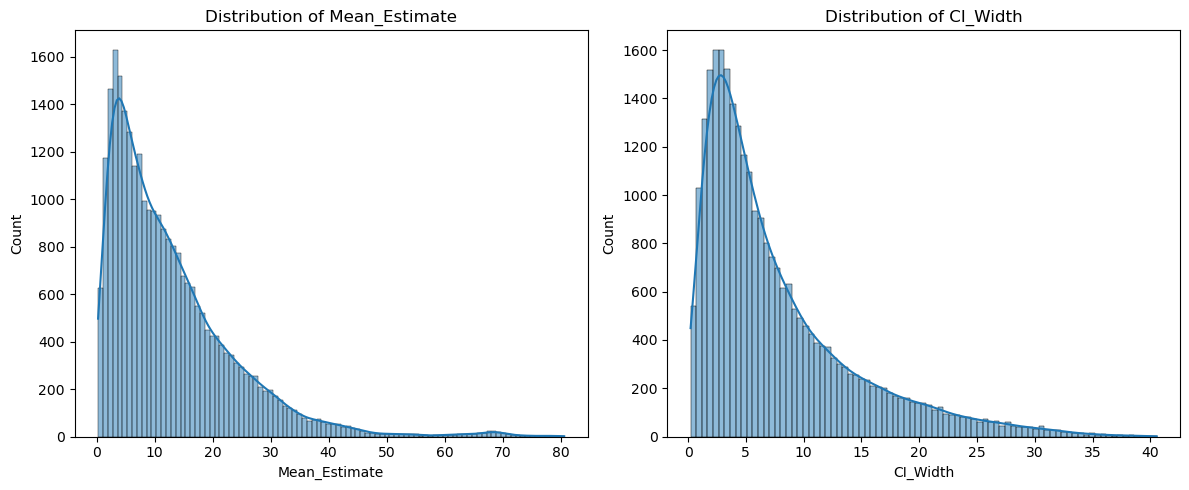

In [147]:
# Checking distribution of Mean_Estimate, CI_Width, etc.
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_obesity['Mean_Estimate'], kde=True)
plt.title('Distribution of Mean_Estimate')

plt.subplot(1, 2, 2)
sns.histplot(df_obesity['CI_Width'], kde=True)
plt.title('Distribution of CI_Width')

plt.tight_layout()
plt.show()




In [148]:
df_malnutrition.isnull().sum()

Region                0
Gender                0
Year                  0
LowerBound            0
UpperBound            0
Mean_Estimate         0
Country               0
CI_Width              0
malnutrition_level    0
age_group             0
dtype: int64

In [149]:
# Analyzing trends across years, regions, or demographic groups
df_obesity.columns

Index(['Region', 'Gender', 'Year', 'LowerBound', 'UpperBound', 'Mean_Estimate',
       'Country', 'CI_Width', 'obesity_level', 'age_group'],
      dtype='object')

In [150]:
df_obesity.head()

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,CI_Width,obesity_level,age_group
2,Africa,Male,2021,1.72177,6.84532,3.68962,Madagascar,5.12355,Low,adult
5,Europe,Both,2022,9.58692,12.36096,10.92481,France,2.77404,Low,adult
8,Western Pacific,Female,2017,6.99715,9.93353,8.41463,Philippines,2.93638,Low,adult
10,Americas,Both,2018,23.66421,28.22921,25.97384,Dominican Republic,4.56500,Moderate,adult
14,Western Pacific,Female,2017,3.35820,4.59334,3.95142,Cambodia,1.23514,Low,adult


In [152]:
df_obesity.dtypes

Region            object
Gender            object
Year               int64
LowerBound       float64
UpperBound       float64
Mean_Estimate    float64
Country           object
CI_Width         float64
obesity_level     object
age_group         object
dtype: object

In [153]:
# converting all obect type into required one in the obicity table

df_obesity[["Region","Gender","obesity_level","age_group"]]=df_obesity[["Region","Gender","obesity_level","age_group"]].astype(str)


In [154]:
# Analyzing trends across years, regions, or demographic groups

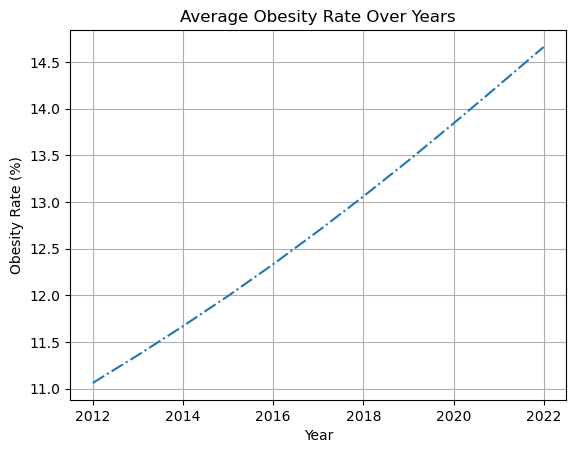

In [155]:
# yearly trend plot
yearly_trend = df_obesity.groupby("Year")["Mean_Estimate"].mean().reset_index()

sns.lineplot(x="Year", y="Mean_Estimate", data=yearly_trend, linestyle="-.")
plt.title("Average Obesity Rate Over Years")
plt.ylabel("Obesity Rate (%)")
plt.xlabel("Year")
plt.grid(True)
plt.show()

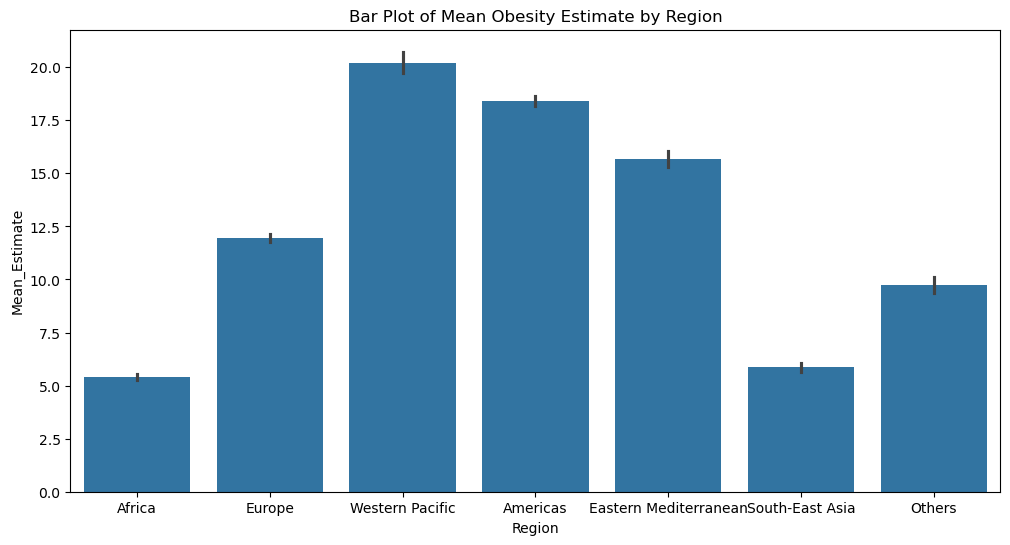

In [164]:
# bar pot to see the Bar Plot of Mean Obesity Estimate by Region

plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Mean_Estimate', data=df_obesity)
plt.title('Bar Plot of Mean Obesity Estimate by Region')
plt.show()

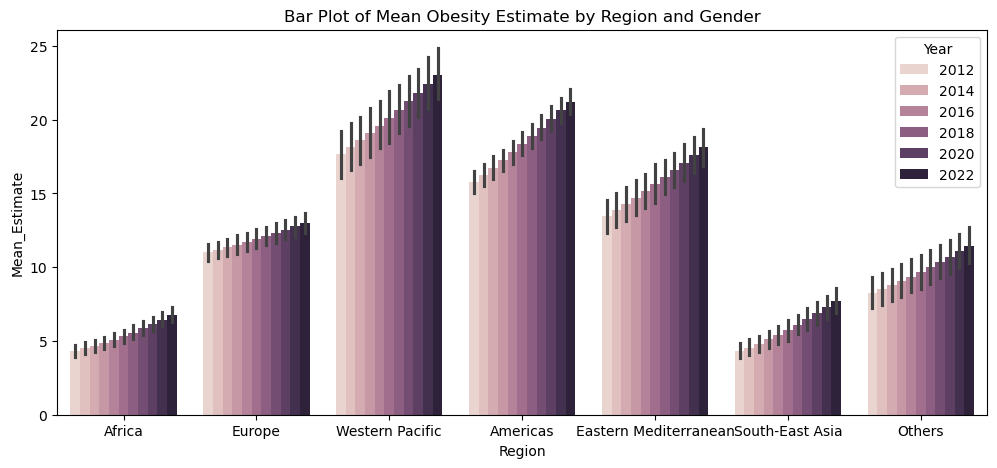

In [165]:
# Bar Plot by Region and Gender
plt.figure(figsize=(12, 5))
sns.barplot(x='Region', y='Mean_Estimate', hue='Year', data=df_obesity)
plt.title('Bar Plot of Mean Obesity Estimate by Region and Gender')
plt.show()


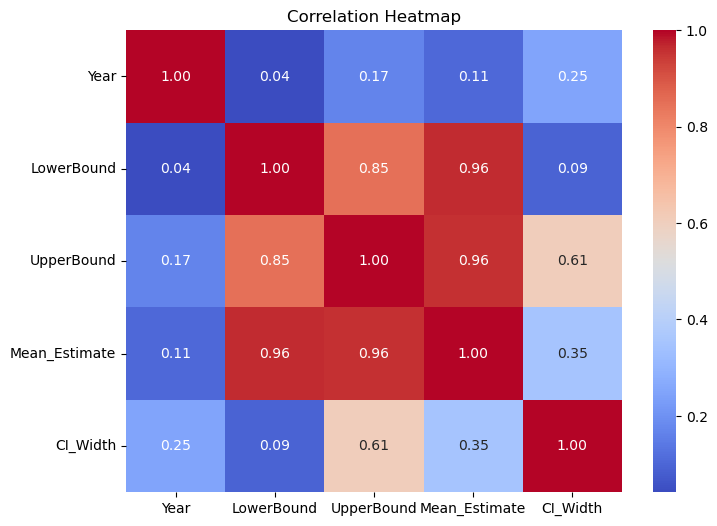

In [166]:
# heatmap to see the corrilation
corr = df_obesity.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


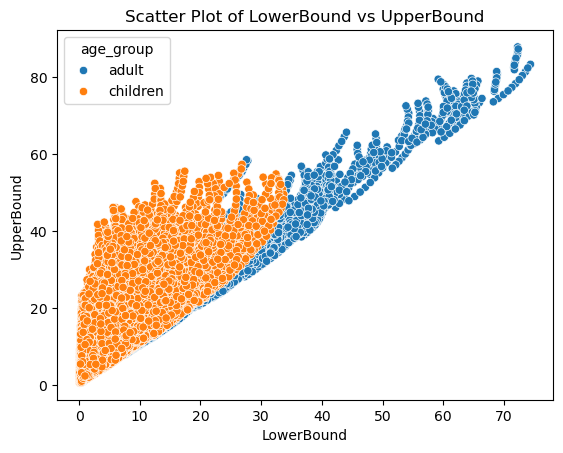

In [168]:
sns.scatterplot(x='LowerBound', y='UpperBound',hue= "age_group" , data=df_obesity)
plt.title('Scatter Plot of LowerBound vs UpperBound')
plt.xlabel('LowerBound')
plt.ylabel('UpperBound')
plt.show()


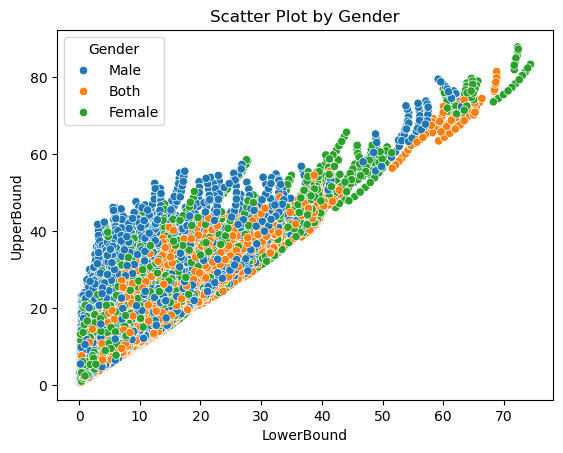

In [169]:
sns.scatterplot(x='LowerBound', y='UpperBound', hue='Gender', data=df_obesity)
plt.title('Scatter Plot by Gender')
plt.show()


# visualization of df_malnutrition dataset

In [171]:
df_malnutrition.head()

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,CI_Width,malnutrition_level,age_group
1,Americas,Female,2017,1.39641,3.13659,2.16071,Costa Rica,1.74018,Low,adult
5,Europe,Female,2012,4.99639,7.55970,6.19024,Tajikistan,2.56331,Low,adult
6,Africa,Male,2019,6.10654,10.56783,8.21884,South Africa,4.46129,Low,adult
9,Europe,Both,2012,1.04285,1.85392,1.41263,Sweden,0.81107,Low,adult
15,Americas,Both,2020,1.16426,5.07886,2.70458,Saint Kitts and Nevis,3.91460,Low,adult


In [177]:
# converting all obect type into required one in the df_malnutrition table

df_malnutrition[["Region","Gender","malnutrition_level","age_group"]]=df_malnutrition[["Region","Gender","malnutrition_level","age_group"]].astype(str)

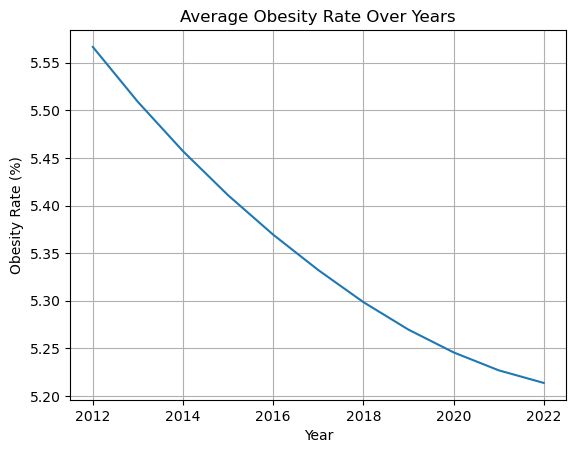

In [179]:
# yearly trend plot
yearly_trend_1 = df_malnutrition.groupby("Year")["Mean_Estimate"].mean().reset_index()

sns.lineplot(x="Year", y="Mean_Estimate", data=yearly_trend_1, linestyle="-")
plt.title("Average Obesity Rate Over Years")
plt.ylabel("Obesity Rate (%)")
plt.xlabel("Year")
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'malnutrition level with ci width')

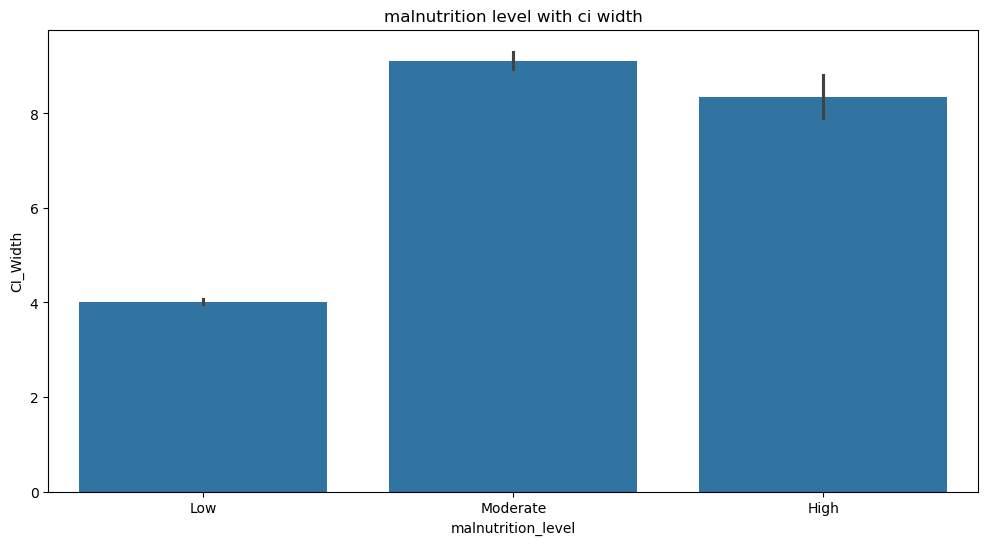

In [181]:
# barplot using df_malnutrition table to see the malnutrition level with ci width
plt.figure(figsize=(12,6))
sns.barplot(data=df_malnutrition,x="malnutrition_level",y="CI_Width")
plt.title("malnutrition level with ci width")

In [182]:
# top ten countrys with high malnutrition level with meanestimate 
country_mean = df_malnutrition.groupby("Country")["Mean_Estimate"].mean().reset_index()

top_10_countries = country_mean.sort_values(by="Mean_Estimate", ascending=False).head(10)
top_10_countries

,Country,Mean_Estimate
87,India,22.142361
175,South-East Asia Region,19.238903
16,Bangladesh,18.245769
177,Sri Lanka,17.871908
60,Eritrea,17.472509
63,Ethiopia,17.392328
186,Timor-Leste,17.099475
164,Senegal,16.818376
137,Niger,16.138562
143,Pakistan,16.123748


Text(0.5, 1.0, 'top_10 conties mean estimate')

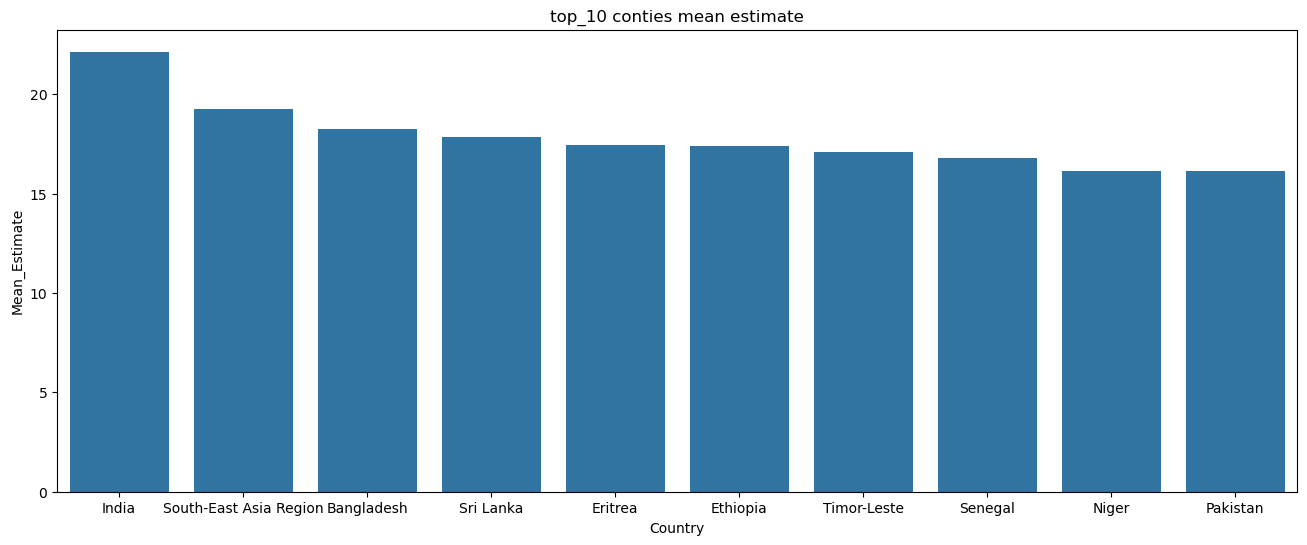

In [185]:
plt.figure(figsize=(16,6))
sns.barplot(data=top_10_countries,x="Country",y="Mean_Estimate")
plt.title("top_10 conties mean estimate")



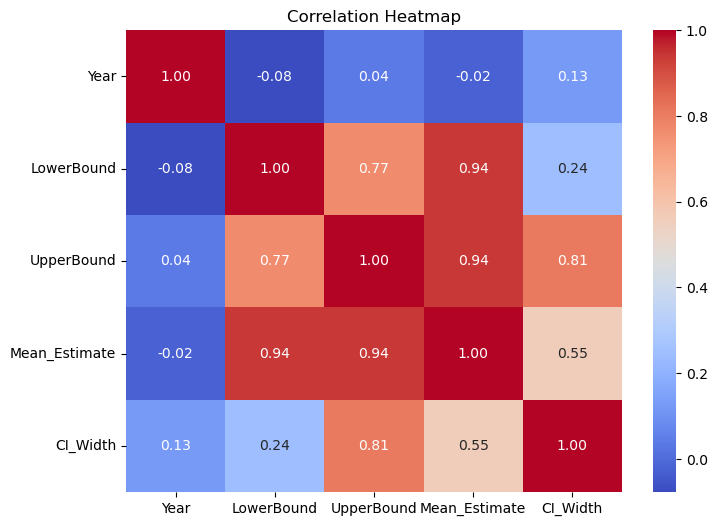

In [187]:

# heatmap to see the corrilation
corr = df_malnutrition.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

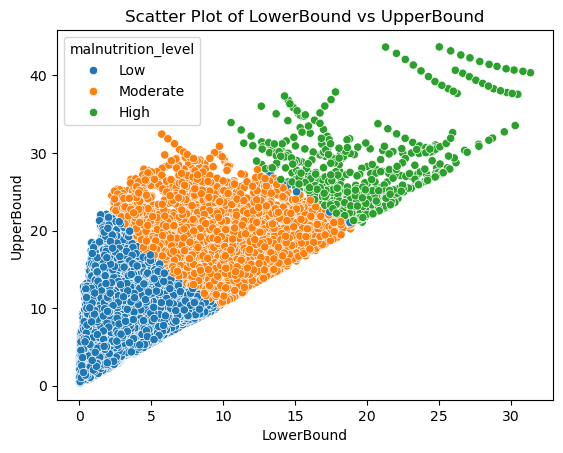

In [189]:
sns.scatterplot(x='LowerBound', y='UpperBound',hue= "malnutrition_level" , data=df_malnutrition)
plt.title('Scatter Plot of LowerBound vs UpperBound')
plt.xlabel('LowerBound')
plt.ylabel('UpperBound')
plt.show()


# my SQL inserting  table codings

In [191]:
!pip install mysql-connector-python
import mysql.connector


## creation of table of obesity table and inserting using .iterrows() in a for loop

In [194]:


def mysql_connection(db_name=None):
    if db_name:
        conn = mysql.connector.connect(
            host="localhost",
            user="root",
            password="Mama@4924",
            database=db_name
        )
    else:
        conn = mysql.connector.connect(
            host="localhost",
            user="root",
            password="Mama@4924"
        )
    cursor = conn.cursor()
    return conn, cursor


In [195]:
conn, cursor = mysql_connection()
cursor.execute("CREATE DATABASE IF NOT EXISTS nutrition")
cursor.close()
conn.close()

conn, cursor = mysql_connection("nutrition")

cursor.execute("DROP TABLE IF EXISTS obesity")
create_table_query = """
CREATE TABLE obesity (
    Region VARCHAR(100),
    Gender VARCHAR(10),
    Year INT,
    LowerBound FLOAT,
    UpperBound FLOAT,
    Mean_Estimate FLOAT,
    Country VARCHAR(100),
    CI_Width FLOAT,
    obesity_level VARCHAR(50),
    age_group VARCHAR(50)
)
"""
cursor.execute(create_table_query)

cursor.close()
conn.close()

conn, cursor = mysql_connection()

conn, cursor = mysql_connection("nutrition")

# inserting the table value to the odesity table in nutrition data base

insert_query = """
INSERT INTO obesity(
    Region,
    Gender,
    Year,
    LowerBound,
    UpperBound,
    Mean_Estimate,
    Country,
    CI_Width,
    obesity_level,
    age_group
)
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""

for index, obesity in df_obesity.iterrows():
    values = (
        obesity["Region"],
        obesity["Gender"],
        int(obesity["Year"]),
        float(obesity["LowerBound"]),
        float(obesity["UpperBound"]),
        float(obesity["Mean_Estimate"]),
        obesity["Country"],
        float(obesity["CI_Width"]),
        obesity["obesity_level"],
        obesity["age_group"]
    )
    cursor.execute(insert_query, values) 

conn.commit()
cursor.close()
conn.close()





In [196]:
for obesity in df_obesity:
    print(obesity)

Region
Gender
Year
LowerBound
UpperBound
Mean_Estimate
Country
CI_Width
obesity_level
age_group


In [197]:
df_obesity.dtypes

Region            object
Gender            object
Year               int64
LowerBound       float64
UpperBound       float64
Mean_Estimate    float64
Country           object
CI_Width         float64
obesity_level     object
age_group         object
dtype: object

In [198]:
df_obesity.columns

Index(['Region', 'Gender', 'Year', 'LowerBound', 'UpperBound', 'Mean_Estimate',
       'Country', 'CI_Width', 'obesity_level', 'age_group'],
      dtype='object')

In [199]:
print(len(df_obesity))

27720


## creation of table of malnutrition table and inserting using .iterrows() in a for loop

In [203]:
print(df_malnutrition.columns)
print(df_malnutrition.dtypes)


Index(['Region', 'Gender', 'Year', 'LowerBound', 'UpperBound', 'Mean_Estimate',
       'Country', 'CI_Width', 'malnutrition_level', 'age_group'],
      dtype='object')
Region                 object
Gender                 object
Year                    int64
LowerBound            float64
UpperBound            float64
Mean_Estimate         float64
Country                object
CI_Width              float64
malnutrition_level     object
age_group              object
dtype: object


In [204]:
conn, cursor = mysql_connection("nutrition")

cursor.execute("DROP TABLE IF EXISTS malnutrition")
create_table_query = """
CREATE TABLE malnutrition (
    Region VARCHAR(100),
    Gender VARCHAR(10),
    Year INT,
    LowerBound FLOAT,
    UpperBound FLOAT,
    Mean_Estimate FLOAT,
    Country VARCHAR(100),
    CI_Width FLOAT,
    malnutrition_level VARCHAR(50),
    age_group VARCHAR(50)
)
"""
cursor.execute(create_table_query)

cursor.close()
conn.close()

conn, cursor = mysql_connection()

conn, cursor = mysql_connection("nutrition")

# inserting the table value to the odesity table in nutrition data base

insert_query = """
INSERT INTO malnutrition(
    Region,
    Gender,
    Year,
    LowerBound,
    UpperBound,
    Mean_Estimate,
    Country,
    CI_Width,
    malnutrition_level,
    age_group
)
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""

for index, malnutrition in df_malnutrition.iterrows():
    values = (
        malnutrition["Region"],
        malnutrition["Gender"],
        int(malnutrition["Year"]),
        float(malnutrition["LowerBound"]),
        float(malnutrition["UpperBound"]),
        float(malnutrition["Mean_Estimate"]),
        malnutrition["Country"],
        float(malnutrition["CI_Width"]),
        malnutrition["malnutrition_level"],
        malnutrition["age_group"]
    )
    cursor.execute(insert_query, values) 

conn.commit()
cursor.close()
conn.close()

# streamlit coding for visuvalisation of data 

In [206]:
!pip install streamlit

In [225]:
import streamlit as st
import pandas as pd
import mysql.connector

st.set_page_config(page_title="Nutrition Paradox Dashboard", layout="wide")
st.title("Nutrition Paradox: A Global View on Obesity and Malnutrition")

def mysql_conn(db_name=None):
    return mysql.connector.connect(
        host="localhost",
        user="root",
        password="Mama@4924",
        database=db_name if db_name else None
    )

conn = mysql_conn("nutrition")
cursor = conn.cursor()

# Run query helper
def run_query(query):
    cursor.execute(query)
    rows = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    return pd.DataFrame(rows, columns=columns)


# ---------------------- OBESITY SECTION ----------------------
st.header("Obesity Queries")
obesity_query = st.selectbox("Select an obesity query", [
    "Top 5 regions with the highest average obesity levels in the most recent year(2022)",
    "Top 5 countries with highest obesity estimates",
    "Obesity trend in India over the years(Mean_estimate)",
    "Average obesity by gender",
    "Country count by obesity level category and age group",
    "Top 5 least reliable countries (highest CI_Width) and top 5 most consistent countries (smallest CI_Width)",
    "Average obesity by age group",
    "Top 10 countries with consistent low obesity (low average + low CI) over the years",
    "Countries where female obesity exceeds male by a large margin (same year)",
    "Global average obesity percentage per year"
])

if st.button("Run Obesity Query"):
    if obesity_query == "Top 5 regions with the highest average obesity levels in the most recent year(2022)":
        query = """
            SELECT Region, ROUND(AVG(Mean_Estimate), 2) AS avg_obesity
            FROM obesity
            WHERE Year = 2022
            GROUP BY Region
            ORDER BY avg_obesity DESC
            LIMIT 5;
        """
    elif obesity_query == "Top 5 countries with highest obesity estimates":
        query = """
            SELECT Country, MAX(Mean_Estimate) AS max_obesity
            FROM obesity
            GROUP BY Country
            ORDER BY max_obesity DESC
            LIMIT 5;
        """
    elif obesity_query == "Obesity trend in India over the years(Mean_estimate)":
        query = """
            SELECT Year, ROUND(AVG(Mean_Estimate), 2) AS obesity_trend
            FROM obesity
            WHERE Country = 'India'
            GROUP BY Year
            ORDER BY Year;
        """
    elif obesity_query == "Average obesity by gender":
        query = """
            SELECT Gender, ROUND(AVG(Mean_Estimate), 2) AS avg_obesity
            FROM obesity
            GROUP BY Gender;
        """
    elif obesity_query == "Country count by obesity level category and age group":
        query = """
            SELECT obesity_level, age_group, COUNT(DISTINCT Country) AS country_count
            FROM obesity
            GROUP BY obesity_level, age_group;
        """
    elif obesity_query == "Top 5 least reliable countries (highest CI_Width) and top 5 most consistent countries (smallest CI_Width)":
        query = """
            (
                SELECT Country, ROUND(AVG(CI_Width), 3) AS avg_ci
                FROM obesity
                GROUP BY Country
                ORDER BY avg_ci DESC
                LIMIT 5
            )
            UNION
            (
                SELECT Country, ROUND(AVG(CI_Width), 3) AS avg_ci
                FROM obesity
                GROUP BY Country
                ORDER BY avg_ci ASC
                LIMIT 5
            );
        """
    elif obesity_query == "Average obesity by age group":
        query = """
            SELECT age_group, ROUND(AVG(Mean_Estimate), 2) AS avg_obesity
            FROM obesity
            GROUP BY age_group;
        """
    elif obesity_query == "Top 10 countries with consistent low obesity (low average + low CI) over the years":
        query = """
            SELECT Country, ROUND(AVG(Mean_Estimate), 2) AS avg_obesity, ROUND(AVG(CI_Width), 2) AS avg_ci
            FROM obesity
            GROUP BY Country
            ORDER BY avg_obesity ASC, avg_ci ASC
            LIMIT 10;
        """
    elif obesity_query == "Countries where female obesity exceeds male by a large margin (same year)":
        query = """
            SELECT o1.Country, o1.Year, (o1.Mean_Estimate - o2.Mean_Estimate) AS diff
            FROM obesity o1
            JOIN obesity o2 ON o1.Country = o2.Country AND o1.Year = o2.Year
            WHERE o1.Gender = 'Female' AND o2.Gender = 'Male'
            AND (o1.Mean_Estimate - o2.Mean_Estimate) > 5
            ORDER BY diff DESC;
        """
    elif obesity_query == "Global average obesity percentage per year":
        query = """
            SELECT Year, ROUND(AVG(Mean_Estimate), 2) AS global_avg_obesity
            FROM obesity
            GROUP BY Year
            ORDER BY Year;
        """
    df = run_query(query)
    st.dataframe(df, use_container_width=True)


# ---------------------- MALNUTRITION SECTION ----------------------
st.header("Malnutrition Queries")
malnutrition_query = st.selectbox("Select a malnutrition query", [
    "Avg. malnutrition by age group",
    "Top 5 countries with highest malnutrition (Mean_Estimate)",
    "Malnutrition trend in African region over the years",
    "Gender-based average malnutrition",
    "Malnutrition level-wise (average CI_Width by age group)",
    "Yearly malnutrition change in specific countries (India, Nigeria, Brazil)",
    "Regions with lowest malnutrition averages"
])

if st.button("Run Malnutrition Query"):
    if malnutrition_query == "Avg. malnutrition by age group":
        query = """
            SELECT age_group, ROUND(AVG(Mean_Estimate), 2) AS avg_malnutrition
            FROM malnutrition
            GROUP BY age_group;
        """
    elif malnutrition_query == "Top 5 countries with highest malnutrition (Mean_Estimate)":
        query = """
            SELECT Country, MAX(Mean_Estimate) AS max_malnutrition
            FROM malnutrition
            GROUP BY Country
            ORDER BY max_malnutrition DESC
            LIMIT 5;
        """
    elif malnutrition_query == "Malnutrition trend in African region over the years":
        query = """
            SELECT Year, ROUND(AVG(Mean_Estimate), 2) AS avg_malnutrition
            FROM malnutrition
            WHERE Region = 'Africa'
            GROUP BY Year
            ORDER BY Year;
        """
    elif malnutrition_query == "Gender-based average malnutrition":
        query = """
            SELECT Gender, ROUND(AVG(Mean_Estimate), 2) AS avg_malnutrition
            FROM malnutrition
            GROUP BY Gender;
        """
    elif malnutrition_query == "Malnutrition level-wise (average CI_Width by age group)":
        query = """
            SELECT age_group, ROUND(AVG(CI_Width), 3) AS avg_ci
            FROM malnutrition
            GROUP BY age_group;
        """
    elif malnutrition_query == "Yearly malnutrition change in specific countries (India, Nigeria, Brazil)":
        query = """
            SELECT Country, Year, ROUND(AVG(Mean_Estimate), 2) AS avg_malnutrition
            FROM malnutrition
            WHERE Country IN ('India', 'Nigeria', 'Brazil')
            GROUP BY Country, Year
            ORDER BY Country, Year;
        """
    elif malnutrition_query == "Regions with lowest malnutrition averages":
        query = """
            SELECT Region, ROUND(AVG(Mean_Estimate), 2) AS avg_malnutrition
            FROM malnutrition
            GROUP BY Region
            ORDER BY avg_malnutrition ASC
            LIMIT 5;
        """
    df = run_query(query)
    st.dataframe(df, use_container_width=True)


# ---------------------- COMBINED SECTION ----------------------
st.header("Combined Obesity & Malnutrition Queries")
combined_query = st.selectbox("Select a combined query", [
    "Obesity vs malnutrition comparison by country (any 5 countries)",
    "Gender-based disparity in both obesity and malnutrition",
    "Region-wise avg estimates side-by-side (Africa and America)",
    "Countries with obesity up & malnutrition down",
    "Age-wise trend analysis"
])

if st.button("Run Combined Query"):
    if combined_query == "Obesity vs malnutrition comparison by country (any 5 countries)":
        query = """
            SELECT o.Country, ROUND(AVG(o.Mean_Estimate), 2) AS avg_obesity, ROUND(AVG(m.Mean_Estimate), 2) AS avg_malnutrition
            FROM obesity o
            JOIN malnutrition m ON o.Country = m.Country AND o.Year = m.Year
            WHERE o.Country IN ('India', 'USA', 'Brazil', 'Nigeria', 'Germany')
            GROUP BY o.Country;
        """
    elif combined_query == "Gender-based disparity in both obesity and malnutrition":
        query = """
            SELECT o.Gender, ROUND(AVG(o.Mean_Estimate), 2) AS avg_obesity, ROUND(AVG(m.Mean_Estimate), 2) AS avg_malnutrition
            FROM obesity o
            JOIN malnutrition m ON o.Country = m.Country AND o.Year = m.Year AND o.Gender = m.Gender
            GROUP BY o.Gender;
        """
    elif combined_query == "Region-wise avg estimates side-by-side (Africa and America)":
        query = """
            SELECT o.Region, ROUND(AVG(o.Mean_Estimate), 2) AS avg_obesity, ROUND(AVG(m.Mean_Estimate), 2) AS avg_malnutrition
            FROM obesity o
            JOIN malnutrition m ON o.Country = m.Country AND o.Year = m.Year
            WHERE o.Region IN ('Africa', 'Americas')
            GROUP BY o.Region;
        """
    elif combined_query == "Countries with obesity up & malnutrition down":
        query = """
            SELECT o.Country, ROUND(AVG(o.Mean_Estimate), 2) AS obesity, ROUND(AVG(m.Mean_Estimate), 2) AS malnutrition
            FROM obesity o
            JOIN malnutrition m ON o.Country = m.Country AND o.Year = m.Year
            GROUP BY o.Country
            HAVING obesity > 30 AND malnutrition < 10;
        """
    elif combined_query == "Age-wise trend analysis":
        query = """
            SELECT o.age_group, ROUND(AVG(o.Mean_Estimate), 2) AS avg_obesity, ROUND(AVG(m.Mean_Estimate), 2) AS avg_malnutrition
            FROM obesity o
            JOIN malnutrition m ON o.Country = m.Country AND o.Year = m.Year AND o.age_group = m.age_group
            GROUP BY o.age_group;
        """
    df = run_query(query)
    st.dataframe(df, use_container_width=True)


In [223]:
print(df_obesity.columns)

Index(['Region', 'Gender', 'Year', 'LowerBound', 'UpperBound', 'Mean_Estimate',
       'Country', 'CI_Width', 'obesity_level', 'age_group'],
      dtype='object')
